In [1]:
from datasets import MultiTaskDataset
from alg.vae import VariationalAutoencoder, ConvolutionalVariationalAutoencoder, train_variational_autoencoder

# MNIST

In [68]:
dataset = MultiTaskDataset('split MNIST', 'cuda')
task_index = 0
x_train, y_train, x_test, y_test = dataset.get_task_dataset(task_index)

In [72]:
vae_config = {
    'in_dim': 784,
    'hidden_dim_enc': 512,
    'num_hidden_enc': 1,
    'emb_dim': 2,
    'hidden_dim_dec': 512,
    'num_hidden_dec': 1,
}
model = VariationalAutoencoder(**vae_config).to('cuda')
train_variational_autoencoder(model, x_train, n_epochs=100, batch_size=1024, verbose=True)

Training VAE:   0%|          | 0/100 [00:00<?, ?it/s]

VariationalAutoencoder(
  (encoder): Encoder(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=784, out_features=512, bias=True)
        (1): ReLU()
      )
    )
    (head_loc): Linear(in_features=512, out_features=2, bias=True)
    (head_scale): Linear(in_features=512, out_features=2, bias=True)
  )
  (decoder): Decoder(
    (layers): ModuleList(
      (0): Sequential(
        (0): Linear(in_features=2, out_features=512, bias=True)
        (1): ReLU()
      )
      (1): Linear(in_features=512, out_features=784, bias=True)
    )
  )
)

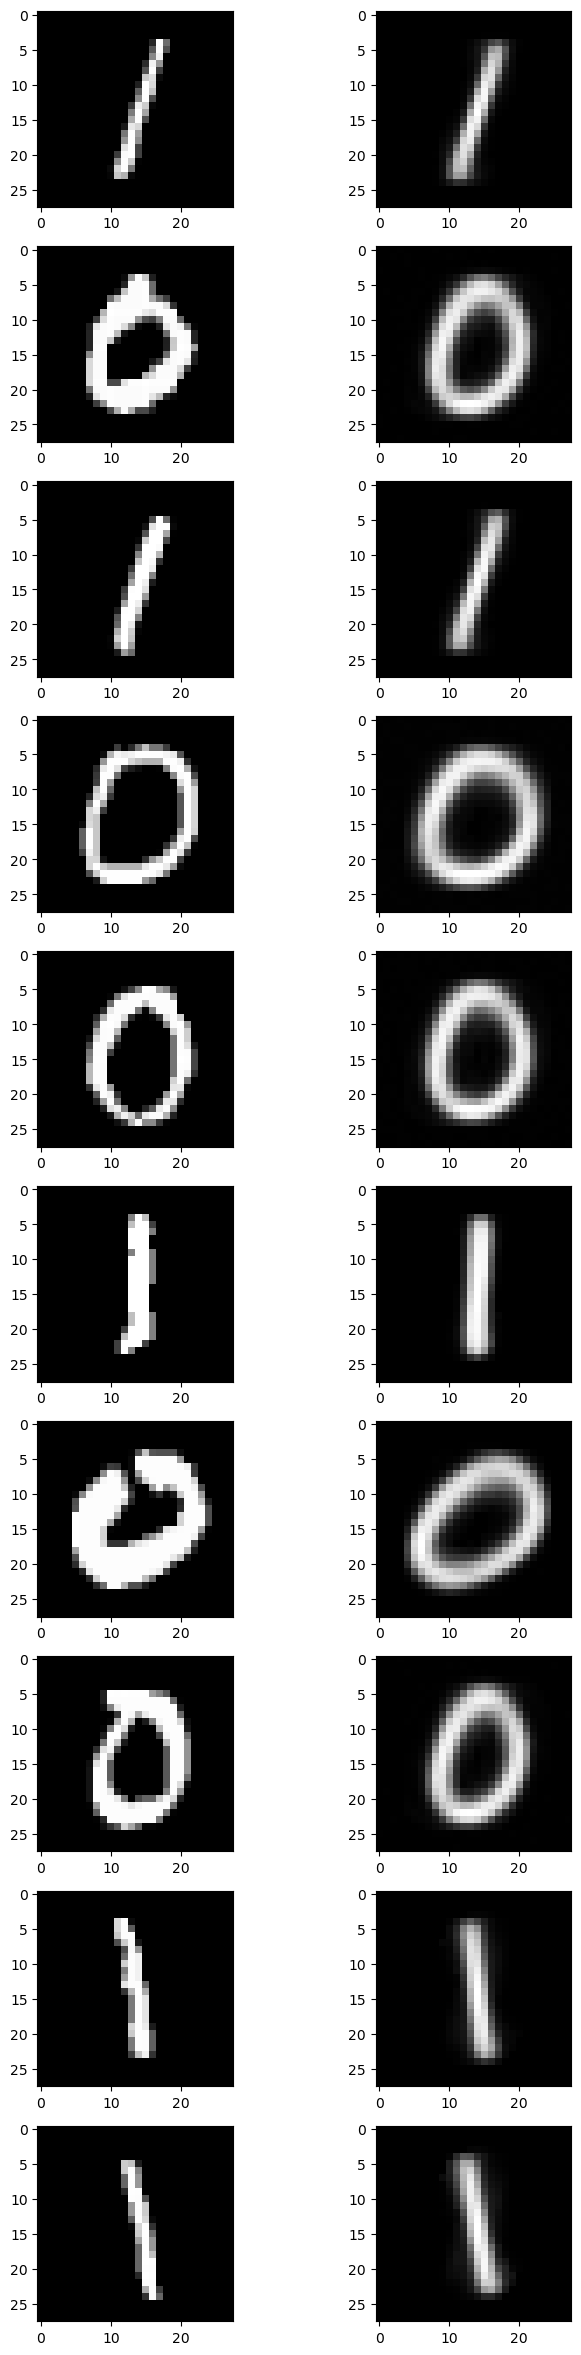

In [73]:
import matplotlib.pyplot as plt
import torch

num_disp = 10
model.eval()
f, axs = plt.subplots(num_disp,2)
f.set_size_inches(8, 30)
for i in range(num_disp):
    axs[i][0].imshow(x_test[i].cpu().reshape(28, 28), cmap="gray")
    with torch.no_grad():
        axs[i][1].imshow(model.autoencode(x_test[i]).cpu().reshape(28, 28), cmap="gray")
model.train()


# CIFAR-10

In [5]:
dataset = MultiTaskDataset('split CIFAR-10', 'cuda')

x_train, y_train, x_test, y_test = dataset.get_task_dataset(0)

Files already downloaded and verified
Files already downloaded and verified


In [6]:
model = ConvolutionalVariationalAutoencoder(emb_dim=32).to('cuda')
train_variational_autoencoder(model, x_train, n_epochs=1000, batch_size=32, verbose=True)

Training VAE: 100%|██████████| 1000/1000 [23:05<00:00,  1.39s/it]


ConvolutionalVariationalAutoencoder(
  (encoder): ConvolutionalEncoder(
    (layers): ModuleList(
      (0): Sequential(
        (0): Conv2d(3, 32, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (1): Sequential(
        (0): Conv2d(32, 64, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
      (2): Sequential(
        (0): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
      )
    )
    (head_loc): Linear(in_features=512, out_features=32, bias=True)
    (head_scale): Linear(in_features=512, out_features=32, bias=True)
  )
  (decoder): ConvolutionalDecoder(
    (first_layer): Sequential(
      (0): Linear(in_features=32, out_features=512, bias=True)
   

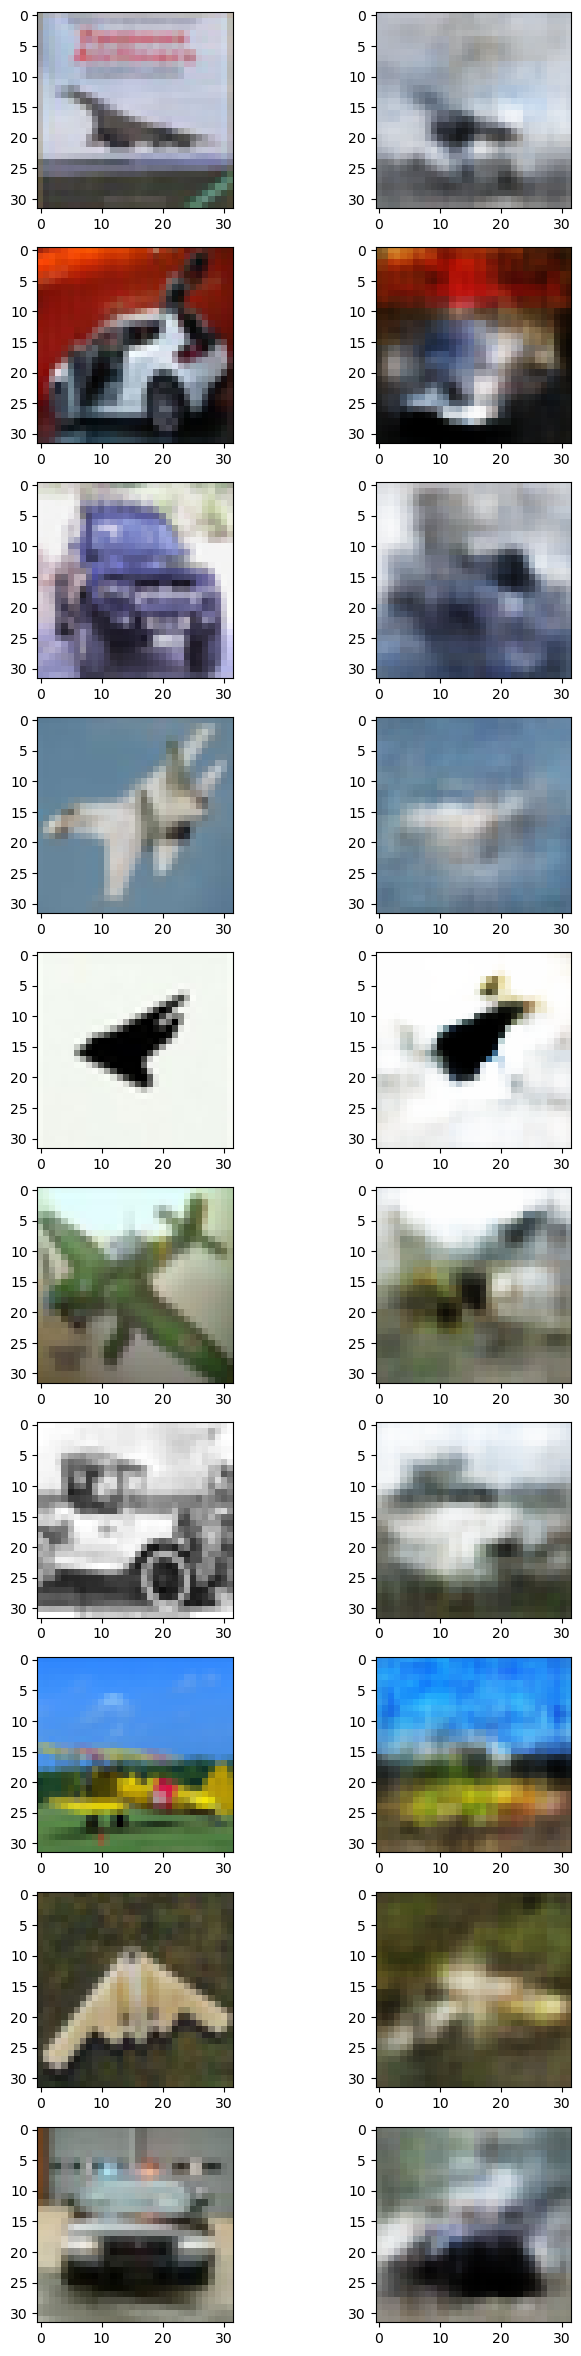

In [7]:
import matplotlib.pyplot as plt
import torch

num_disp = 10
model.eval()
f, axs = plt.subplots(num_disp,2)
f.set_size_inches(8, 30)
for i in range(num_disp):
    axs[i][0].imshow(x_test[i].cpu().permute(1 , 2 , 0), interpolation='nearest')
    with torch.no_grad():
        axs[i][1].imshow(model.autoencode(x_test[i])[0].cpu().permute(1 , 2 , 0), interpolation='nearest')
model.train()